In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터셋 로드
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [5]:
data = pd.DataFrame(data, columns=columns)
print(data.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [6]:
# Unsupervised Learning: K-Means

# 데이터 전처리 필요 -> MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [7]:
print(data.shape)

(178, 13)


In [8]:
# 13차원에서는 패턴을 찾기 힘드므로 차원을 축소한다
# PCA(차원의 축소)
# PCA (차원의 축소)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)
print(data)

[[-7.06335756e-01 -2.53192753e-01]
 [-4.84976802e-01 -8.82289142e-03]
 [-5.21172266e-01 -1.89187222e-01]
 [-8.21643663e-01 -5.80905512e-01]
 [-2.02546382e-01 -5.94665740e-02]
 [-6.08190152e-01 -4.87519191e-01]
 [-5.44047399e-01 -3.00196497e-01]
 [-4.74357495e-01 -2.98197021e-01]
 [-5.00432012e-01 -3.07602859e-01]
 [-6.27517969e-01 -2.06328233e-01]
 [-7.27467157e-01 -3.56512044e-01]
 [-3.74967744e-01 -2.25424535e-01]
 [-4.48188283e-01 -2.31938139e-01]
 [-6.26345329e-01 -3.55138677e-01]
 [-8.35717011e-01 -5.38047802e-01]
 [-4.71931568e-01 -3.37405385e-01]
 [-4.26990905e-01 -4.50842684e-01]
 [-3.66595704e-01 -3.15750341e-01]
 [-7.18788533e-01 -5.93881332e-01]
 [-4.58884986e-01 -1.75782240e-01]
 [-6.61852288e-01 -1.27831032e-01]
 [-2.67900032e-01  9.81127565e-03]
 [-5.99782399e-01  7.82494523e-04]
 [-4.17894800e-01  1.13786901e-01]
 [-4.49940392e-01  9.83771974e-02]
 [-2.15787795e-01  9.26270331e-03]
 [-4.15531996e-01 -1.55470385e-01]
 [-2.83946970e-01 -8.97364262e-02]
 [-4.75099227e-01 -8

==> 13차원의 데이터가 2차원으로 변환되었다. 전처리 끝.

In [9]:
# Unsupervised learning: k-Means clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) # 세 종류이므로 3의 값을 넣어준다.
kmeans.fit(data)
cluster = kmeans.predict(data)

In [10]:
print(cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 0 2 2 2 2 0 2 0
 0 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


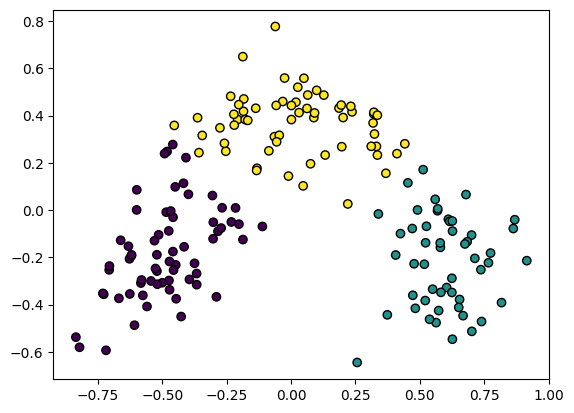

In [12]:
# 데이터 시각화하기
# 첫 번째, 두 번째 특성을 사용한다.
plt.scatter(data[:,0],data[:,1], c=cluster, edgecolor='black', linewidth=1)
plt.show()

In [13]:
# Silhouette
from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1

for n_cluster in range(2,11):
  kmeans = KMeans(n_clusters=n_cluster)
  kmeans.fit(data)
  cluster = kmeans.predict(data)
  score = silhouette_score(data, cluster)

  print('클러스터의 수: {} 실루엣 점수:{:.2f}'.format(n_cluster, score))

  if score > best_score:
    best_n = n_cluster
    best_score = score

print('가장 높은 실루엣 점수를 가진 클러스터 수: {}, 실루엣 점수 {:.2f}'.format(best_n, best_score))

클러스터의 수: 2 실루엣 점수:0.49
클러스터의 수: 3 실루엣 점수:0.57
클러스터의 수: 4 실루엣 점수:0.49
클러스터의 수: 5 실루엣 점수:0.46
클러스터의 수: 6 실루엣 점수:0.43
클러스터의 수: 7 실루엣 점수:0.40
클러스터의 수: 8 실루엣 점수:0.40
클러스터의 수: 9 실루엣 점수:0.40
클러스터의 수: 10 실루엣 점수:0.39
가장 높은 실루엣 점수를 가진 클러스터 수: 3, 실루엣 점수 0.57
